<h1 style="font-size: 50px; text-align: center; color:Yellow; background-color:red; padding:25px; border:2px solid black">IPL Analysis</h1>

<p><b>All data is taken from <a href="https://codebasics.io/challenges/codebasics-resume-project-challenge/13">Code Basics</a> </b></p>

<hr>
<h1>Data Exploration</h1>
<hr>

**Datasets:**
- dim_players.csv
- dim_match_summary.csv
- fact_bating_summary.csv
- fact_bowling_summary.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_players = pd.read_csv("./datasets/dim_players.csv")
df_players

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter
...,...,...,...,...,...
287,AbishekPorel,Capitals,Left hand Bat,Not Available,Wicketkeeper Batter
288,SisandaMagala,Super Kings,Right hand Bat,Right arm Fast medium,Bowler
289,MohitRathee,Punjab Kings,Right hand Bat,Legbreak,Allrounder
290,RajvardhanHangargekar,Super Kings,Right hand Bat,Right arm Fast medium,Bowling Allrounder


In [3]:
df_players.team.unique()

array(['Super Kings', 'KKR', 'Capitals', 'RCB', 'Mumbai', 'Sunrisers',
       'Royals', 'Punjab Kings', 'Titans', 'Super Giants'], dtype=object)

In [4]:
# Player count by teams
df_players.team.value_counts()

team
Mumbai          39
Punjab Kings    38
Sunrisers       35
KKR             35
Royals          33
RCB             30
Capitals        29
Super Kings     28
Titans          13
Super Giants    12
Name: count, dtype: int64

In [5]:
# player count by role
df_players.playingRole.value_counts()

playingRole
Bowler                 117
Allrounder              41
Wicketkeeper Batter     29
Top order Batter        27
Bowling Allrounder      23
Batting Allrounder      19
Middle order Batter     13
Batter                  12
Opening Batter          11
Name: count, dtype: int64

In [6]:
df_players.isnull().sum()

name            0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
dtype: int64

Reading remaining datasets

In [7]:
df_match_summary =  pd.read_csv("./datasets/dim_match_summary.csv")
df_fact_bating =  pd.read_csv("./datasets/fact_bating_summary.csv")
df_fact_bowling =  pd.read_csv("./datasets/fact_bowling_summary.csv")

In [8]:
df_match_summary.head(3)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597


In [9]:
df_match_summary.shape

(206, 6)

In [10]:
type(df_match_summary.matchDate[0])

str

In [11]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [12]:
df_match_summary.isna().sum()

team1        0
team2        0
winner       0
margin       0
matchDate    0
match_id     0
dtype: int64

In [13]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [14]:
df_fact_bating.shape

(3268, 11)

In [15]:
df_fact_bating.isna().sum()

match_id       0
match          0
teamInnings    0
battingPos     0
batsmanName    0
out/not_out    0
runs           0
balls          0
4s             0
6s             0
SR             0
dtype: int64

In [16]:
df_fact_bating["out/not_out"].value_counts()

out/not_out
out        2527
not_out     741
Name: count, dtype: int64

In [17]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [18]:
df_fact_bowling.shape

(2436, 14)

In [19]:
df_fact_bowling.overs.unique()

array([3. , 4. , 1. , 3.5, 1.4, 3.4, 2. , 3.1, 2.2, 2.1, 2.3, 2.4, 0.1,
       3.3, 1.1, 2.5, 3.2, 1.5, 1.3, 0.3, 0.2, 1.2, 0.5])

In [20]:
df_fact_bowling.isna().sum()

match_id       0
match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
dtype: int64

<hr>
<h1>Data Cleaning</h1>
<hr>

In [31]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [33]:
df_match_summary.matchDate.replace("May 28-29, 2023","May 28, 2023", inplace=True)

In [34]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [35]:
type(df_match_summary.matchDate[0])

str

In [36]:
df_match_summary.matchDate = pd.to_datetime(df_match_summary.matchDate, format="%b %d, %Y" )

In [37]:
type(df_match_summary.matchDate[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942


In [55]:
enumerate(sorted(df_match_summary.matchDate.dt.year.unique()))

In [48]:
df_year_season = {}
for i, value in enumerate(sorted(df_match_summary.matchDate.dt.year.unique())):
    df_year_season[value] = f"Season {i+1}"

print(df_year_season)

{np.int32(2021): 'Season 1', np.int32(2022): 'Season 2', np.int32(2023): 'Season 3'}


In [49]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942


In [52]:
df_match_summary["season"] = df_match_summary.matchDate.dt.year.map(df_year_season)
df_match_summary

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1
...,...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,2023-04-02,T202485,Season 3
202,Royals,Sunrisers,Royals,72 runs,2023-04-02,T209117,Season 3
203,Super Giants,Capitals,Super Giants,50 runs,2023-04-01,T208512,Season 3
204,Punjab Kings,KKR,Punjab Kings,7 runs,2023-04-01,T202853,Season 3


In [53]:
df_fact_bating

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3263,T201566,Super Kings Vs Titans,Titans,3,SaiSudharsan,out,22,17,3,0,129.41,1
3264,T201566,Super Kings Vs Titans,Titans,4,HardikPandya,out,8,11,0,0,72.72,1
3265,T201566,Super Kings Vs Titans,Titans,5,VijayShankar,out,27,21,2,1,128.57,1
3266,T201566,Super Kings Vs Titans,Titans,6,RahulTewatia,not_out,15,14,1,1,107.14,0


<hr>
<h1>Data Transformation</h1>
<hr>

In [27]:
df_fact_bating["out/not_out"].value_counts()

out/not_out
out        2527
not_out     741
Name: count, dtype: int64

In [28]:
def out_counts(value):
    if isinstance(value,str) and value == "out":
        return 1
    else:
        return 0

In [29]:
df_fact_bating["outs"] = df_fact_bating["out/not_out"].apply(out_counts)
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [56]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [57]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1


In [59]:
df_bating_season_merged = pd.merge( df_match_summary,df_fact_bating, on="match_id")
df_bating_season_merged.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [60]:
df_bating_season_merged[df_bating_season_merged.batsmanName == "RuturajGaikwad"]

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
55,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1,Capitals Vs Super Kings,Super Kings,1,RuturajGaikwad,out,70,50,5,2,140.00,1
112,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,Season 1,Super Kings Vs Punjab Kings,Super Kings,1,RuturajGaikwad,out,12,14,1,0,85.71,1
157,Super Kings,Capitals,Capitals,3 wickets,2021-10-04,T207682,Season 1,Super Kings Vs Capitals,Super Kings,1,RuturajGaikwad,out,13,13,2,0,100.00,1
206,Super Kings,Royals,Royals,7 wickets,2021-10-02,T205672,Season 1,Super Kings Vs Royals,Super Kings,1,RuturajGaikwad,not_out,101,60,9,5,168.33,0
259,Sunrisers,Super Kings,Super Kings,6 wickets,2021-09-30,T203061,Season 1,Sunrisers Vs Super Kings,Super Kings,1,RuturajGaikwad,out,45,38,4,2,118.42,1
352,KKR,Super Kings,Super Kings,2 wickets,2021-09-26,T202406,Season 1,KKR Vs Super Kings,Super Kings,1,RuturajGaikwad,out,40,28,2,3,142.85,1
403,RCB,Super Kings,Super Kings,6 wickets,2021-09-24,T207776,Season 1,RCB Vs Super Kings,Super Kings,1,RuturajGaikwad,out,38,26,4,1,146.15,1
467,Super Kings,Mumbai,Super Kings,20 runs,2021-09-19,T201256,Season 1,Super Kings Vs Mumbai,Super Kings,1,RuturajGaikwad,not_out,88,58,9,4,151.72,0
514,Super Kings,Mumbai,Mumbai,4 wickets,2021-05-01,T203694,Season 1,Super Kings Vs Mumbai,Super Kings,1,RuturajGaikwad,out,4,4,1,0,100.00,1


In [62]:
batsman_ball_season = df_bating_season_merged.groupby(["batsmanName","season"]).balls.sum().reset_index()

batsman_ball_season

,batsmanName,season,balls
0,ABdeVilliers,Season 1,211
1,AaronFinch,Season 2,61
2,AbdulBasith,Season 3,1
3,AbdulSamad,Season 1,87
4,AbdulSamad,Season 2,7
...,...,...,...
496,YashasviJaiswal,Season 2,194
497,YashasviJaiswal,Season 3,382
498,YudhvirSingh,Season 3,2
499,YuzvendraChahal,Season 1,27


In [80]:
eligible_batsman = batsman_ball_season[batsman_ball_season.balls >= 60].groupby("batsmanName").count()
eligible_batsman

,season,balls
batsmanName,,
ABdeVilliers,1,1
AaronFinch,1,1
AbdulSamad,2,2
AbhinavManohar,2,2
AbhishekSharma,3,3
...,...,...
VijayShankar,1,1
ViratKohli,3,3
WashingtonSundar,2,2


In [81]:
eligible_batsman =  eligible_batsman[eligible_batsman.season == 3].reset_index()
eligible_batsman

,batsmanName,season,balls
0,AbhishekSharma,3,3
1,AidenMarkram,3,3
2,AmbatiRayudu,3,3
3,AndreRussell,3,3
4,DavidMiller,3,3
5,DavidWarner,3,3
6,DeepakHooda,3,3
7,DevduttPadikkal,3,3
8,DineshKarthik,3,3
9,FafduPlessis,3,3


In [82]:
avg_df =df_bating_season_merged[df_bating_season_merged["batsmanName"].isin(eligible_batsman.batsmanName)]
avg_df

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1
5,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Super Kings,6,ShivamDube,out,19,18,0,1,105.55,1
3258,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Super Kings,7,RavindraJadeja,out,1,2,0,0,50.00,1
3261,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Titans,1,WriddhimanSaha,out,25,16,2,2,156.25,1
3262,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Titans,2,ShubmanGill,out,63,36,6,3,175.00,1


In [83]:
bating_avg = avg_df.groupby("batsmanName").apply(lambda row: row["runs"].sum() / row["outs"].sum())
bating_avg

C:\Users\memon\AppData\Local\Temp\ipykernel_6152\3126951544.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bating_avg = avg_df.groupby("batsmanName").apply(lambda row: row["runs"].sum() / row["outs"].sum())


batsmanName
AbhishekSharma     24.833333
AidenMarkram       32.291667
AmbatiRayudu       22.225806
AndreRussell       27.592593
DavidMiller        43.200000
DavidWarner        37.900000
DeepakHooda        19.857143
DevduttPadikkal    26.200000
DineshKarthik      24.750000
FafduPlessis       43.595238
GlennMaxwell       34.685714
HardikPandya       30.967742
IshanKishan        30.081081
JosButtler         41.916667
KLRahul            50.533333
KrunalPandya       17.724138
MShahrukhKhan      20.285714
ManishPandey       25.714286
MarcusStoinis      26.875000
MayankAgarwal      27.484848
MoeenAli           23.387097
NicholasPooran     24.300000
NitishRana         29.666667
PrithviShaw        25.468750
QuintondeKock      33.857143
RahulTripathi      28.500000
RavindraJadeja     31.352941
RiyanParag         14.160000
RohitSharma        22.813953
RuturajGaikwad     37.928571
SanjuSamson        32.600000
ShikharDhawan      39.771429
ShimronHetmyer     40.666667
ShivamDube         32.310345
Sh

In [85]:
bating_avg = bating_avg.sort_values(ascending = False).head(10)
bating_avg

batsmanName
KLRahul            50.533333
FafduPlessis       43.595238
DavidMiller        43.200000
JosButtler         41.916667
ShimronHetmyer     40.666667
ShubmanGill        40.239130
ShikharDhawan      39.771429
RuturajGaikwad     37.928571
DavidWarner        37.900000
SuryakumarYadav    35.000000
dtype: float64

<hr>
<h1>Insight Generation</h1>
<hr>

<h2 style="color:red">Primary Analysis</h2>

In [21]:
# Presets
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

<h3>1. Top 10 batsmen based on past 3 years total runs scored.</h3>

In [22]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [23]:
df_fact_bating[df_fact_bating.batsmanName == "RuturajGaikwad"].runs.sum()

np.int64(1593)

In [24]:
top_runs = df_fact_bating.groupby("batsmanName")["runs"].sum().sort_values(ascending = False)

top_runs = top_runs.head(10)
top_runs

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

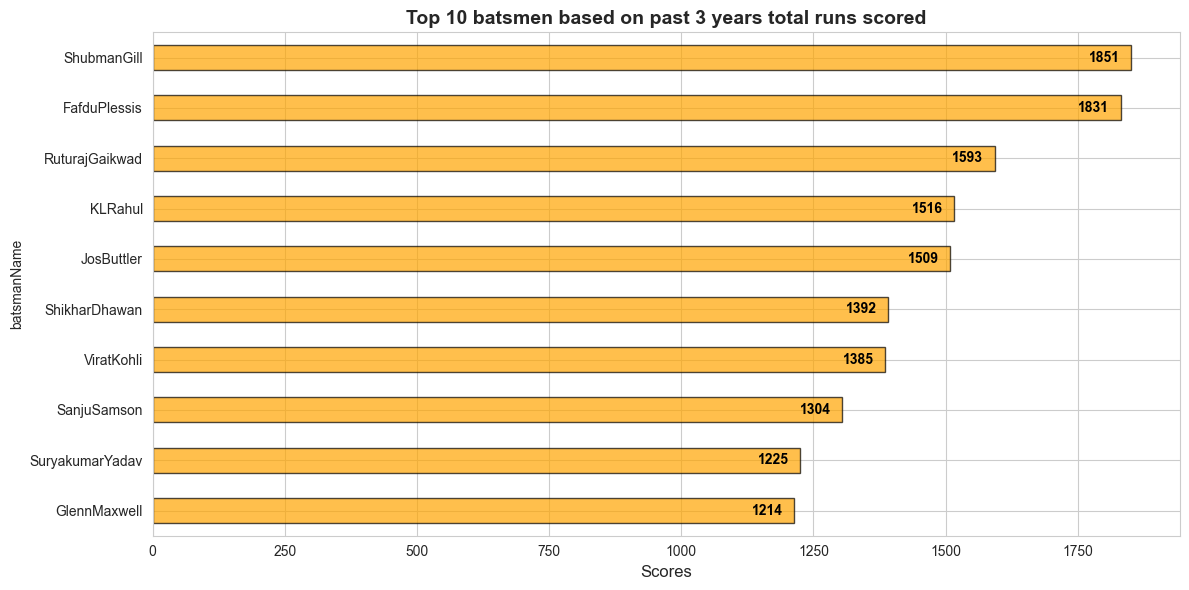

In [25]:
ax = top_runs.sort_values().plot(kind="barh", color="orange", edgecolor="black", alpha=0.7 )

# Titles and labels
plt.title("Top 10 batsmen based on past 3 years total runs scored", fontsize=14, weight='bold')
plt.xlabel("Scores", fontsize=12)

# Annotate scores on bars
for i, v in enumerate(top_runs.sort_values()):
    ax.text(
        v-80 ,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='black',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

# Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)


In [87]:
bating_avg

batsmanName
KLRahul            50.533333
FafduPlessis       43.595238
DavidMiller        43.200000
JosButtler         41.916667
ShimronHetmyer     40.666667
ShubmanGill        40.239130
ShikharDhawan      39.771429
RuturajGaikwad     37.928571
DavidWarner        37.900000
SuryakumarYadav    35.000000
dtype: float64

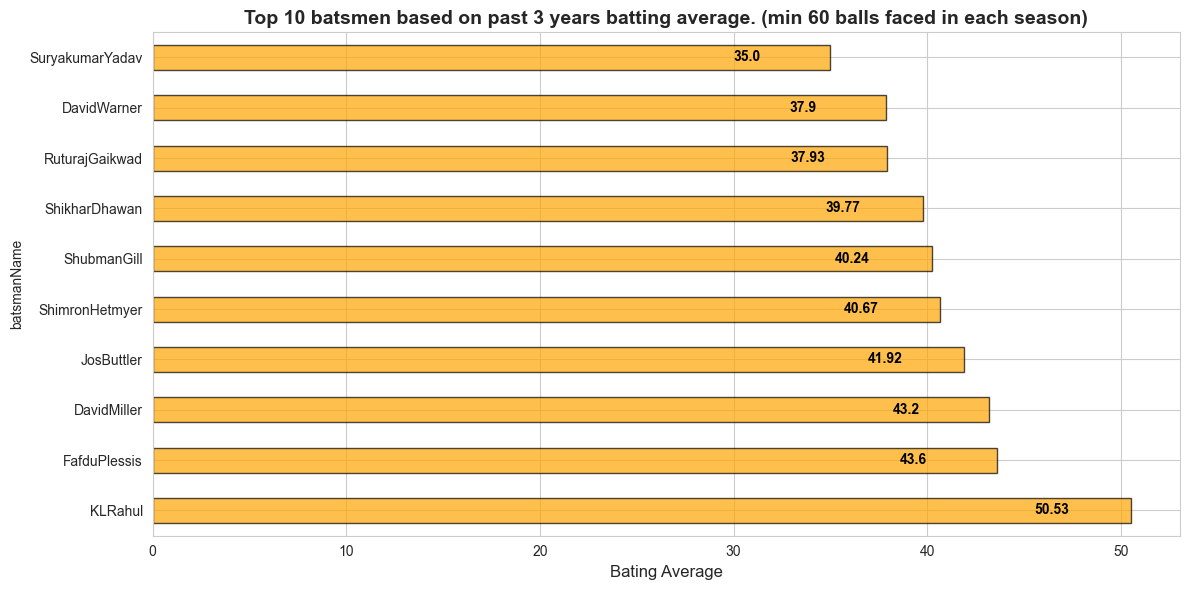

In [93]:
ax = bating_avg.plot(kind="barh", color="orange", edgecolor="black", alpha=0.7 )

# Titles and labels
plt.title("Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)", fontsize=14, weight='bold')
plt.xlabel("Bating Average", fontsize=12)

# Annotate scores on bars
for i, v in enumerate(bating_avg.round(2)):
    ax.text(
        v -5 ,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='black',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()